## Boletín de problemas I


Jose A. Hernando

*Departamento de Física de Partículas. Universidade de Santiago de Compostela*

Octubre 2024


In [23]:
import time
print(' Last version ', time.asctime() )

 Last version  Thu Oct 31 16:46:13 2024


In [24]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import scipy.constants as units

## Unidades 

In [25]:
print('hbar = {:4e} J/s'.format(units.hbar))
print('c  = {:4e} m/s'.format(units.c))
GeV_to_Julio = units.giga * units.eV
print('GeV  = {:4e} J '.format(GeV_to_Julio))
hbarc = units.hbar * units.c / (GeV_to_Julio * units.femto) # GeV fm
print('hbar c  =  {:4e} GeV fm'.format(hbarc))

hbar = 1.054572e-34 J/s
c  = 2.997925e+08 m/s
GeV  = 1.602177e-10 J 
hbar c  =  1.973270e-01 GeV fm


In [26]:
me = (units.m_e * units.c**2)/(GeV_to_Julio) # GeV
mp = (units.m_p * units.c**2)/(GeV_to_Julio) # GeV

print('electron mass {:4.3f} MeV'.format(me *1e3))
print('proton   mass {:4.3f} GeV'.format(mp))

electron mass 0.511 MeV
proton   mass 0.938 GeV


In [27]:
energy         = lambda m, p : np.sqrt(m**2 + p**2)
momentum       = lambda m, E : np.sqrt(E**2 - m**2)
gamma_lorentz  = lambda m, E : m/E
beta_lorentz   = lambda p, E : p/E
kinetic_energy = lambda m, E : E - m

In [28]:
mass_invariant   = lambda p: np.sqrt(p[0]**2 - momentum_module(p)**2)
momentum_module  = lambda p: np.sqrt( p[1:].dot(p[1:]) )
phi_angle        = lambda p: np.arctan2(p[2], p[1])

def theta_angle(p):
    rho   = np.sqrt(p[1]**2 +p[2]**2)
    theta = np.arctan2(rho, p[3])
    phi   = np.arctan2(p[2], p[1])
    return theta if phi < np.pi/2 else -theta

def lorentz_matrix(beta):
    gamma = 1/np.sqrt(1 - beta**2)
    lorentz = np.zeros(16).reshape(4, 4)
    lorentz[0, 0] = gamma; lorentz[0, 3] =  gamma * beta
    lorentz[1, 1] = 1    ; lorentz[2, 2] = 1
    lorentz[3, 3] = gamma; lorentz[3, 0] =  gamma*beta
    return lorentz

def lorentz_transform(beta, p):
    lorentz = lorentz_matrix(beta)
    return lorentz.dot(p.transpose())

def p_write(p, name):
    print('{:s}:  p  = [{:4.3f}, {:4.3f}, {:4.3f}, {:4.3f}]'.format(name, *p))
    print('{:s}: |p| =  {:4.3f}, mass = {:4.3f}'.format(name, momentum_module(p), mass_invariant(p)))
    return

In [29]:
energy_cm_2body_s   = lambda s , mb, mc: (s + mb**2 - mc**2)/ (2 * np.sqrt(s))
energy_cm_2body     = lambda ma, mb, mc: energy_cm_2body_s(ma**2, mb, mc)  
momentum_cm_2body_s = lambda s , mb, mc: np.sqrt( (s - (mb + mc)**2) * ( s - (mb - mc)**2) )/ (2 * np.sqrt(s))
momentum_cm_2body   = lambda ma, mb, mc: momentum_cm_2body_s(ma**2, mb, mc) 

------

**problema 1**

Da en unidades naturales los valores:

  * a) fs y fm en potencias de GeVs. 

  * b) m, s en potencias de eV.

  * c) barn en función de GeV.

*solución:*

a) sabemos $\hbar c = 197 $ MeV fm = 1, luego fm $= \frac{1}{197}$ MeV$^{-1}$

c) sabemos $c = 2.9998 \, 10^8$ m/s = 1,luego s $= 2.9998 \, 10^8$ m, luego fs = c fm 

d) sabemos 1 barn = $10^{-28}$ m$^2$, cambiamos m a 1/GeV

In [30]:
print('hbarc = {:e} GeV fm'.format(hbarc))
fm_un = 1/hbarc #1/GeV
print('fm    = {:e} 1/GeV '.format(fm_un))
ps_un = units.femto * (units.c / (units.femto)) * fm_un
print('fs    = {:e} 1/GeV '.format(ps_un))
m_un = fm_un/(units.femto) # 1/GeV
print('m  = {:e} 1/eV, eV = {:e} 1/m '.format(m_un/units.giga, units.giga/m_un))
#s_un = fs_un / (units.femto)
#print('s  = {:e} 1/eV, eV = {:e} 1/s '.format(s_un/units.giga, units.giga/s_un))
m_un = fm_un / (units.femto)
barn = 1e-28 * (m_un)**2
print('barn = {:e} 1/GeV2 '.format(barn))

hbarc = 1.973270e-01 GeV fm
fm    = 5.067731e+00 1/GeV 
fs    = 1.519267e+09 1/GeV 
m  = 5.067731e+06 1/eV, eV = 1.973270e-07 1/m 
barn = 2.568189e+03 1/GeV2 


--------

**problema 2**

Compara energía de un Boeing 747, cuya masa es 400 toneladas, a su velocidad crucero de 850 km/h, con la aniquilación de un mosquito por un antimosquito, siendo la masa del mosquito 1 mg. 


In [31]:
mb = 400e3  # kg
mm = 1.0e-6 # kg
v  = 850e3/(60*60) # m/s
boeing_ene   = 0.5 * mb * v**2
mosquito_ene = 2   * mm * units.c**2
print('energy boeing/mosquito {:4.3f}'.format(boeing_ene/mosquito_ene))
print('boeing {:e} J, mosquito {:e} J'.format(boeing_ene, mosquito_ene))
print('boeing {:e} GeV, mosquito {:e} GeV'.format(boeing_ene/GeV_to_Julio, mosquito_ene/GeV_to_Julio))

energy boeing/mosquito 0.062
boeing 1.114969e+10 J, mosquito 1.797510e+11 J
boeing 6.959090e+19 GeV, mosquito 1.121918e+21 GeV


-------

**problema 3**

¿Cuál es la energía y velocidad de una partícula de 3 GeV de masa con un momento de 4 GeV en la dirección $z$? 

energy   (MeV) 5.000
velocity (beta) 0.80 velocity (m/s) 2.398340e+08


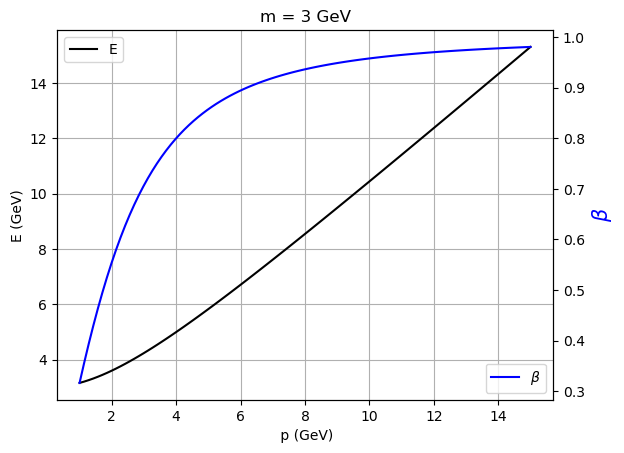

In [32]:
m, p   = 3, 4 # GeV
E      = energy(m, p)
b      = beta_lorentz(p, E)
print('energy   (MeV) {:3.3f}'.format(E))
print('velocity (beta) {:3.2f} velocity (m/s) {:2e}'.format(b, b * units.c))

ps = np.linspace(1, 15, 100)
plt.plot(ps, energy(m, ps), c = 'black', label = 'E')
plt.xlabel(' p (GeV)'); plt.ylabel('E (GeV)'); plt.title('m = 3 GeV')
plt.grid(); plt.legend();
ax = plt.gca().twinx()
plt.plot(ps, beta_lorentz(ps, energy(m, ps)), c = 'blue', label = r'$\beta$')
plt.ylabel(r'$\beta$', c = 'blue', fontsize = 15); plt.legend(loc=4);

-------

**problema 4**

Sea una partícula $a$ con masa $m_a$ que se desintegra a otras dos $a \to b+c$, con masas $m_b, m_c$. Da las expresiones de la energía y momento de $b, c$ en el CM. Demostrar que el momento de las partículas hijas en el CM es:
            
$$
p^* = \frac{1}{2m_a} \sqrt{[m^2_a - (m_b+m_c)^2] [m^2_a - (m_b - m_c)^2]}
$$


*solución*

Ver [Extensión cinemática], sección del invariante s]

$$
E^*_b = \frac{m^2_a + m^2_b - m^2_c}{2 m_a}, \\
E^*_c = \frac{m^2_a + m^2_c - m^2_b}{2 m_a}, \\
$$
$$
p^*   = \frac{\sqrt{\left[m^2_a - (m_b+m_c)^2 \right] \left[ m^2_a - (m_b - m_a)^2 \right]}}{2m_a}   
$$

------

**ejercicio 5 (antiguo)**

Sean $\Lambda \to p + \pi^-$ y $\Xi^- \to \Lambda + \pi^-$. ¿Cuál es la carga de $\Lambda$? Indica si son bariones o mesones $\Lambda$ y $\Xi^-$. Busca sus masas en PDG, sus vidad medias y su fracción de desintegración. ¿Qué tipo de desintegración es, débil o fuerte? Da el momento y energía en CM de la desintegración

*solución*

Del [PDG](https://pdg.lbl.gov/2021/listings/contents_listings.html)

$m(\Lambda) = 1115.683 \pm 0.006$ MeV, $\mathcal{Br}(\Lambda \to p + \pi^-) = 63.9 \pm 0.5$ %, $\tau = (2.632 \pm 0.02) \, 10^{-10}$ s

Del [PDG](https://pdg.lbl.gov/2021/listings/contents_listings.html)
                                        
$m(\Xi^-) = 1321.71 \pm 0.07$ MeV, $\mathcal{Br}(\Xi^- \to \Lambda + \pi^-) = 99.9$ %, $\tau = (1.639 \pm 0.015) \, 10^{-10}$ s

Los dos son bariones, $\Lambda$ tiene carga 0, y por el valor de la vida media se desintegran débilmente.

In [33]:
energy_cm_2body_s   = lambda s , mb, mc: (s + mb**2 - mc**2)/ (2 * np.sqrt(s))
energy_cm_2body     = lambda ma, mb, mc: energy_cm_2body_s(ma**2, mb, mc)  
momentum_cm_2body_s = lambda s , mb, mc: np.sqrt( (s - (mb + mc)**2) * ( s - (mb - mc)**2) )/ (2 * np.sqrt(s))
momentum_cm_2body   = lambda ma, mb, mc: momentum_cm_2body_s(ma**2, mb, mc) 

In [34]:
mlambda = 1115.68 # MeV
mp      = 938.27 # MeV
mpi     = 139.6 # MeV
ep  = energy_cm_2body  (mlambda, mp , mpi)
epi = energy_cm_2body  (mlambda, mpi, mp)
pp  = momentum_cm_2body(mlambda, mp , mpi)
print('E p {:4.3f} MeV'   .format(ep))
print('E pi   {:4.3f} MeV'.format(epi))
print('p      {:4.3f} MeV'.format(pp))

E p 943.642 MeV
E pi   172.038 MeV
p      100.544 MeV


In [35]:
mxi     = 1321.71 # MeV
ep  = energy_cm_2body  (mxi, mlambda, mpi)
epi = energy_cm_2body  (mxi, mpi    , mlambda)
pp  = momentum_cm_2body(mxi, mlambda, mpi)
print('E p {:4.3f} MeV'   .format(ep))
print('E pi   {:4.3f} MeV'.format(epi))
print('p      {:4.3f} MeV'.format(pp))

E p 1124.366 MeV
E pi   197.344 MeV
p      139.487 MeV


----

**problema 5**

Considera la desintegración $K^- \to \mu + \bar{\nu}_\mu$. Calcula la energía y momento en el CM del $\mu, \bar{\nu}_\mu$ y el máximo momento del $\mu$ si el $K^-$ tienen un momento de 5 GeV.


La energía y momento del leptón son:
$$
E_l = \frac{m^2_K + m^2_l}{2 m_K}, \; \; p_l = \frac{m^2_K - m^2_l}{2 m_K}, \;\;
$$

El momento máximo corresponderá al momento del $\mu$ en la dirección y sentido del $K$ incidente, que recibirá un *boost* de $\gamma = E_K/m_K, \; \beta = p_K/E_K$. Asi:

$$
p'_\mu = \gamma \beta E^*_\mu + \gamma p^*_\mu
$$


In [42]:
ene_cm = lambda ml, mhad = mpi : (mhad**2 + ml**2)/(2*mhad)
p_cm   = lambda ml, mhad = mpi : (mhad**2 - ml**2)/(2*mhad)

In [44]:
mkaon = 493.67 # MeV
mmu = 105.66  # MeV

e_mu, p_mu = ene_cm(mmu, mkaon), p_cm(mmu, mkaon)
e_nu, p_nu = p_mu, p_mu
print(' energy mu  = {:5.3f} MeV'.format(e_mu))
print(' momento mu = {:5.3f} MeV '.format(p_mu))

e_kaon = 5000 # MeV
p_kaon = momentum(mkaon, e_kaon)
gamma_kaon, beta_kaon = e_kaon/mkaon, p_kaon/e_kaon
p_max_mu = gamma_kaon * beta_kaon * e_mu + gamma_kaon * p_mu
print(' momentum mu maximo en lab = {:5.3f} MeV '.format(p_max_mu))
p_min_nu = gamma_kaon * beta_kaon * e_nu - gamma_kaon * p_nu
print(' momentum nu minimo en lab = {:5.3f} MeV '.format(p_min_nu))

 energy mu  = 258.142 MeV
 momento mu = 235.528 MeV 
 momentum mu maximo en lab = 4987.225 MeV 
 momentum nu minimo en lab = -11.656 MeV 


In [36]:
mpi = 139.6 # MeV
me  = 0.511 # MeV
emu = energy_cm_2body  (mpi, me, 0)
enu = energy_cm_2body  (mpi, 0 , me)
pcm = momentum_cm_2body(mpi, me, 0)
print('E elec {:4.3f} MeV'.format(emu))
print('E nu   {:4.3f} MeV'.format(enu))
print('p      {:4.3f} MeV'.format(pcm))

E elec 69.801 MeV
E nu   69.799 MeV
p      69.799 MeV


----

**ejercicio 6**

La partícula $\Lambda$, se desintegra $\Lambda \to p + \pi^-$. Si $p_\Lambda = 2$ GeV y el $p$ sale con $\theta^* = 30^o$ en el CM respecto la dirección de $\Lambda$, calcular: 

a) la energía de $\Lambda, \pi^-$ en el CM. 

b) el factor de Lorentz $\gamma$ y $\beta$ entre el sistema laboratorio y el CM.

c) ángulo y momento del $\pi, p$ en el sistema laboratorio.

[AB1.15]

In [37]:
mlambda = 1115.68 # MeV
mp      = 938.27 # MeV
mpi     = 139.57 # MeV
ep  = energy_cm_2body  (mlambda, mp , mpi)
epi = energy_cm_2body  (mlambda, mpi, mp)
pp  = momentum_cm_2body(mlambda, mp , mpi)
print('E p  = {:4.3f} MeV'.format(ep))
print('E pi = {:4.3f} MeV'.format(epi))
print('p    = {:4.3f} MeV'.format(pp))

E p  = 943.645 MeV
E pi = 172.035 MeV
p    = 100.579 MeV


In [38]:
plambda = 2000
elambda = energy(mlambda, plambda)
print('lambda energy {:4.3f} MeV'.format(elambda))
gamma = gamma_lorentz(elambda, mlambda)
beta  = beta_lorentz (plambda, elambda)
print('beta = {:4.3f}, gamma {:4.3f} '.format(beta, gamma))

lambda energy 2290.140 MeV
beta = 0.873, gamma 2.053 


Se cumple que: 
$$
 p_x  = p \sin \theta = p^* \sin \theta^*,\\ 
p_z  = p \cos \theta = \gamma(\beta E + p^* \cos \theta^*) 
$$
donde $p, \theta$ es el momento y el ángulo en el lab.

Luego:

$$
\tan \theta = \frac{p^* \sin \theta}{\gamma(\beta E + p^* \cos \theta^*)}
$$


In [39]:
theta_cm = (30./180.) * np.pi
pp_cm   = np.array((ep ,  pp *np.sin(theta_cm), 0,  pp * np.cos (theta_cm)))
ppi_cm  = np.array((epi, -pp *np.sin(theta_cm), 0, -pp * np.cos (theta_cm)))
pla_cm  = ppi_cm + pp_cm

p_write(ppi_cm, 'pi')
p_write(pp_cm , 'p')
p_write(pla_cm, 'lambda')
print('pi : theta = {:4.1f} (o) '.format(theta_angle(ppi_cm) * (180/np.pi)))

pi:  p  = [172.035, -50.289, 0.000, -87.104]
pi: |p| =  100.579, mass = 139.570
p:  p  = [943.645, 50.289, 0.000, 87.104]
p: |p| =  100.579, mass = 938.270
lambda:  p  = [1115.680, 0.000, 0.000, 0.000]
lambda: |p| =  0.000, mass = 1115.680
pi : theta = -150.0 (o) 


In [40]:
lorentz = lorentz_matrix(beta)
pp_lab  = lorentz.dot( pp_cm .transpose() )
ppi_lab = lorentz.dot( ppi_cm.transpose() )
pla_lab = ppi_lab + pp_lab

p_write(ppi_lab, 'pi')
p_write(pp_lab , 'p')
p_write(pla_lab, 'lambda')
print('p  : theta = {:4.1f} (o) '.format(theta_angle(pp_lab ) * (180/np.pi)))
print('pi : theta = {:4.1f} (o) '.format(theta_angle(ppi_lab) * (180/np.pi)))

pi:  p  = [196.988, -50.289, 0.000, 129.597]
pi: |p| =  139.013, mass = 139.570
p:  p  = [2093.152, 50.289, 0.000, 1870.403]
p: |p| =  1871.079, mass = 938.270
lambda:  p  = [2290.140, 0.000, 0.000, 2000.000]
lambda: |p| =  2000.000, mass = 1115.680
p  : theta =  1.5 (o) 
pi : theta = -21.2 (o) 


------

**ejercicio 7**

Encontrar el ángulo mínimo de apertura entre los fotones de la desintegración $\pi^0 \to \gamma \gamma$ si la energía del pión es 10 GeV. 

*solución*

Sea $a \to b + c$, $p_a = p_b + p_c$, en el sistema laboratorio
$$
s = (E_b + E_c, {\bf p}_b + {\bf p_c})^2 = (E_b + E_c)^2 - E^2_b - E^2_c- 2 E_b E_c \cos \theta_{bc} \\
 s = 2 E_b E_c ( 1 - \cos \theta_{bc}) = 4 E^2 x (1-x) \sin^2 \frac{\theta_{bc}}{2} \\
 \sin \frac{\theta_{bc}}{2} = \sqrt{\frac{s}{4 E^2 x (1-x)}}
$$
donde $x  \in [0, 1]$, siendo $s = m^2_\pi = (0.135)^2$ GeV$^2$ y $E = 10$ GeV.

El valor mínimo de $\theta_{bc}$ corresponde al máximo de $x(1-x)$ que es $x = 1/2$, esto es $E_b = E_c = 5$ GeV

theta min angle 0.0270 rad, 1.547 degrees


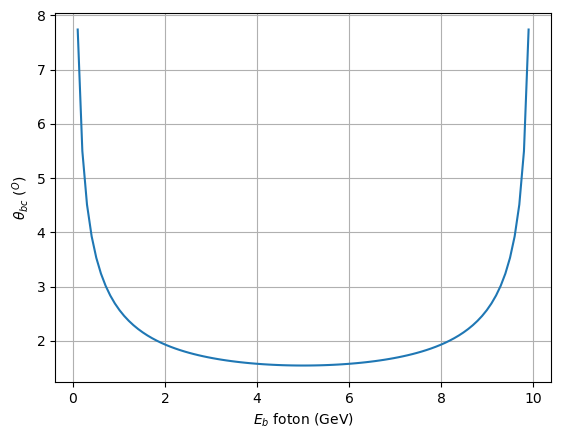

In [16]:
mpi = 0.135 ## GeV
E   = 10 # GeV

def pi_theta(x, ss, E):    
    den = 4 * E**2 * x * (1 - x)
    if (den == 0): return np.nan
    return 2 * np.arcsin( np.sqrt(ss/den) )

xs = np.linspace(0., 1.,  100)
thetas = [180 * pi_theta(xi, mpi*mpi, E)/ np.pi for xi in xs]
plt.plot(E * xs, thetas); 
plt.xlabel(r'$E_b$ foton (GeV)'); plt.ylabel(r'$\theta_{bc}$ ($^O$)'); plt.grid();

theta_min = pi_theta(0.5, mpi*mpi, E)
print('theta min angle {:5.4f} rad, {:5.3f} degrees'.format(theta_min, 180*theta_min/np.pi))

Por otro lado el valor mínimo de la energía, de la fracción $x$, debe corresponder al máximo $\theta = \pi, \sin^2 \theta/2 = 1$, por lo que:

$$
x(1-x) = \frac{s}{4E^2},\;\; x = \frac{1 - \sqrt{1 - s/E^2}}{2} 

In [17]:
mpi = 0.135 # GeV
E   = 10. # GeV
xmin = (1 - np.sqrt(1 - mpi*mpi/E**2))/2
print('minimum energy {:4.3f} keV'.format(E * xmin * 1e6))

minimum energy 455.646 keV


Otra forma de hacer el ejercicio es mediante las transformaciones de Lorentz.

En el sistema CM, los cuadrimomentos de los fotones son:

$$
p_b = \frac{m_\pi}{2} (1, 0, \sin \theta^*, \cos \theta^*), \\
p_c = \frac{m_\pi}{2} (1, 0, -\sin \theta^*, -\cos \theta^*),
$$
donde $\theta^*$ es el ángulo respecto al eje $z$.

En el sistema de laboratorio, los cuadrimomentos son:
$$
p'_b = \frac{m_\pi}{2} \left(\gamma(1 + \beta \cos \theta^*), 0, \sin \theta^*, \gamma(\beta + \cos \theta^*) \right), \\
p'_c = \frac{m_\pi}{2} \left(\gamma(1 - \beta \cos \theta^*), 0, -\sin \theta^*, \gamma(\beta - \cos \theta^*) \right),
$$

En producto escalar de los momentos de los fotones en el sistema laboratorio es:
  
$$
{\bf p'}_{b} {\bf p'}_c = \frac{m^2_\pi}{4} \left( - \sin^2 \theta^* + \gamma^2 (\beta^2 - \cos^2 \theta^*)\right) \\
= \frac{m^2_\pi}{4} \gamma^2 \left( -(1 - \beta^2) (1-\cos^2\theta^*) + (\beta^2 - \cos^2 \theta^*) )\right)
= \frac{m^2_\pi}{4}\gamma^2 \left( \beta^2 - 1 - \beta^2 \cos^2\theta^* \right)
$$
donde $\gamma^2 = (1-\beta^2)^{-1}$

Por otra parte: ${\bf p'}_{b} {\bf p'}_c = E_b E_c \cos \theta_{bc}$, así:

$$
E_b = \frac{m_\pi}{2} \gamma (1 + \beta \cos \theta^*), \\
E_c = \frac{m_\pi}{2} \gamma (1 - \beta \cos \theta^*), \\
\cos \theta_{bc} = \frac{2\beta^2 -1 - \beta^2 \cos^2 \theta^*}{1 - \beta^2 \cos^2 \theta^*}
$$

En este caso para $\theta^* = \pi/2$ tenemos $\theta_{bc}$ mínimo:
$$
\cos \theta_{bc} = 2\beta^2 -1
$$
Donde:
$$
    \beta = \frac{p}{E} = \sqrt{1 - \frac{m^2}{E^2}}
$$

theta min 0.027 rad, 1.547 degrees


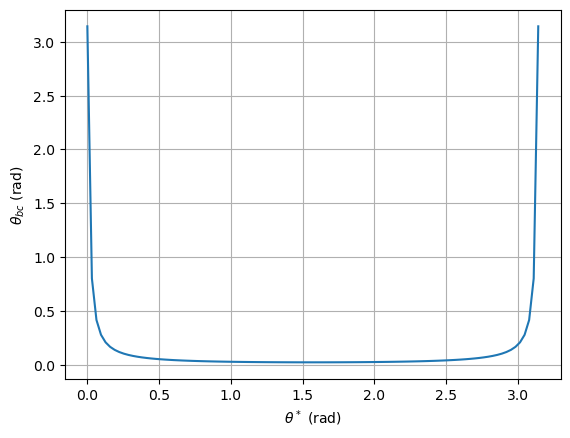

In [20]:
beta = np.sqrt(E**2 - mpi*mpi)/E
ctheta = 2*beta*beta -1
thetamin = np.arccos(ctheta)
print('theta min {:4.3f} rad, {:4.3f} degrees'.format(thetamin, 180 * thetamin / np.pi)) 

ctheta_bc = lambda theta: (2*beta**2 -1 - beta**2 * np.cos(theta)**2) / (1 - beta**2 * np.cos(theta)**2)
thetas = np.linspace(0, np.pi, 100)
plt.plot(thetas, np.arccos(ctheta_bc(thetas)));
plt.grid(); plt.xlabel(r'$\theta^*$ (rad)'); plt.ylabel(r'$\theta_{bc}$ (rad)');

La energía mínima de $E_c$ correspondera para el caso $\theta^* = 0$.

$$
E^{min}_c = \frac{m_\pi}{2} \gamma (1 - \beta)
$$

In [22]:
emin = (mpi/2) * (E/mpi) * (1 - beta)
print('E foton min {:4.3f} KeV'.format(emin * 1e6))

E foton min 455.646 KeV


------